<a href="https://colab.research.google.com/github/unedsky/DigitRecog/blob/main/neuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Handwritten Digit Detection


##Import Libraries


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras

##Import Dataset

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
#TODO: Check out preloaded sklearn datasets

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

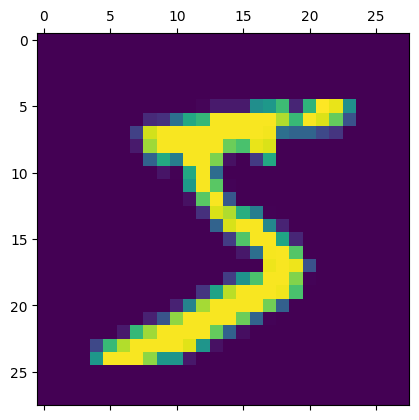

In [ ]:
plt.matshow(X_train[0])

In [ ]:
X_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [ ]:
y_train[0]

np.uint8(5)

##Scale the dataset
for better results

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
x_train_flattened = X_train.reshape(len(X_train), 28*28)
x_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
x_train_flattened.shape

(60000, 784)

##Import the model
specify number of nodes, layers, optimizer, loss funtion, metrics and epochs

In [ ]:
model = keras.Sequential([
    #.Dense(output_size, input_size, activation_funtion)
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
#check out the optimizers in the tensorflow documentation

model.fit(x_train_flattened, y_train, epochs = 5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8170 - loss: 0.7114
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9125 - loss: 0.3164
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9195 - loss: 0.2841
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9215 - loss: 0.2758
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9246 - loss: 0.2666


##Evaluation

In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9150 - loss: 0.3005


[0.2648935914039612, 0.9261000156402588]

##Prediction

In [ ]:
x_test_pred = model.predict(x_test_flattened)
x_test_pred[0]
#the output returns a array of 10 elements, each has the confidence values of the prediction in their respective positions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.3284515e-02, 2.2418138e-07, 7.8443363e-02, 9.4658011e-01,
       2.7427811e-03, 9.2684835e-02, 1.1630814e-06, 9.9972242e-01,
       7.5027660e-02, 6.3654482e-01], dtype=float32)

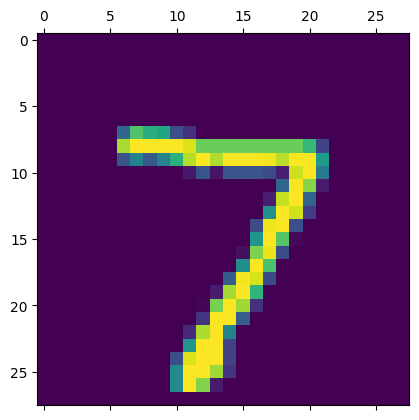

In [ ]:
plt.matshow(X_test[0])

argmax is a numpy function for finding the maximum value in a ndarray (returns position)

In [ ]:
 np.argmax(x_test_pred[0])

np.int64(7)

#Gradient Descent

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

##Types of Gradient Descent:
  1. Batch Gradient Descent:

In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, scaled_X.T) + b

    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_true-y_predicted))

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

In [ ]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
  w1 = w2=1
  bias = 0
  rate = 0.5
  n = len(age)
  for i in range(epochs):
    weighted_sum = w1 * age + w2 * affordability + bias
    y_predicted = sigmoid_numpy(weighted_sum)
    loss = log_loss(y_true, y_predicted)

    w1d =(1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
    w2d =(1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))

    bias_d = np.mean(y_predicted-y_true)
    w1 = w1 - rate * w1d
    w2 = w2 - rate * w2d
    bias = bias - rate * bias_d

    print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss: {loss}')

    if loss <= loss_thresold:
      break

  return w1, w2, bias

SyntaxError: invalid syntax (<ipython-input-18-0ee34bf34640>, line 24)

#Neural Network (from scratch)